<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

In [2]:
###Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable y).

#### Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####Load Data

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-full.csv',sep=';')

In [5]:
dataset.sample(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13153,31,blue-collar,married,primary,no,229,no,no,telephone,8,jul,186,2,-1,0,unknown,no
32506,54,blue-collar,married,primary,no,1895,yes,no,cellular,17,apr,345,1,-1,0,unknown,no
25183,45,management,married,tertiary,no,0,no,no,cellular,18,nov,179,2,-1,0,unknown,no
8151,31,admin.,married,secondary,no,-581,yes,no,unknown,2,jun,562,3,-1,0,unknown,no
7334,27,management,single,tertiary,no,12956,yes,no,unknown,29,may,789,3,-1,0,unknown,yes
26959,49,management,married,tertiary,no,436,no,no,cellular,21,nov,215,1,-1,0,unknown,no
7038,27,blue-collar,single,primary,no,3955,yes,no,unknown,28,may,205,3,-1,0,unknown,no
30217,29,admin.,married,secondary,no,503,no,yes,cellular,5,feb,433,1,199,2,failure,no
41045,43,unemployed,married,secondary,no,775,no,no,cellular,14,aug,98,1,106,1,failure,no
23337,47,technician,divorced,secondary,no,598,no,no,cellular,27,aug,120,8,-1,0,unknown,no


In [6]:
dataset['y'].replace({'yes':1,'no':0},inplace=True)

In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#### Exploratory data analysis

In [8]:
### checking data type of variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [9]:
### checking if there are any missing values
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
### checking descriptive statistics
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [11]:
### Corealation matrix for numerical variables
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00,0.03
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02,0.05
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05,-0.03
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,0.39
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45,0.10
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00,0.09
y,0.03,0.05,-0.03,0.39,-0.07,0.10,0.09,1.00


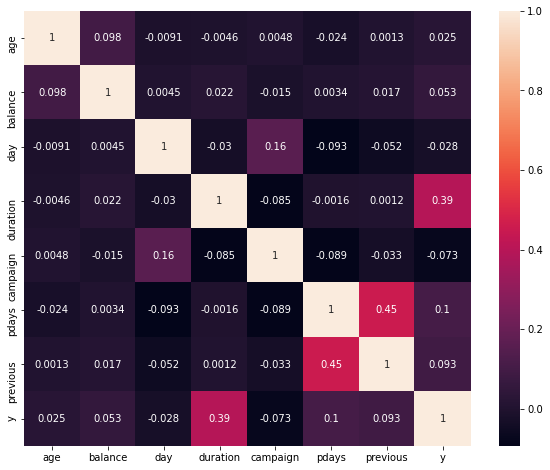

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True);

In [13]:
### target variable y
dataset['y'].value_counts()/dataset.shape[0]

0    0.883015
1    0.116985
Name: y, dtype: float64

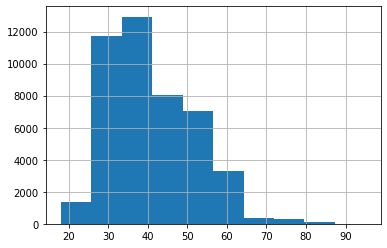

In [14]:
dataset['age'].hist()

In [15]:
np.unique(dataset['y'],return_counts=True)

(array([0, 1]), array([39922,  5289]))

In [16]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
### Unique values per column
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job --> 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> 3
['married' 'single' 'divorced']

education --> 4
['tertiary' 'secondary' 'unknown' 'primary']

default --> 2
['no' 'yes']

balance --> 7168
[ 2143    29     2 ...  8205 14204 16353]

housing --> 2
['yes' 'no']

loan --> 2
['no' 'yes']

contact --> 3
['unknown' 'cellular' 'telephone']

day --> 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month --> 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration --> 1573
[ 261  151   76 ... 1298 1246 1556]

campaign --> 48
[ 1  2  3  5  4  6  7  

In [30]:
### Distributions

numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [19]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Column name: age
Unique values: 77


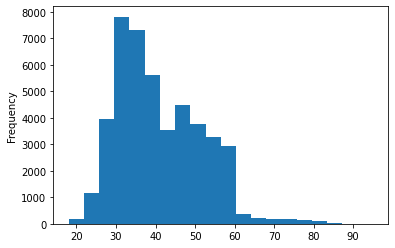

Column name: balance
Unique values: 7168


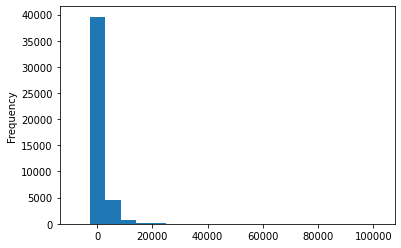

Column name: day
Unique values: 31


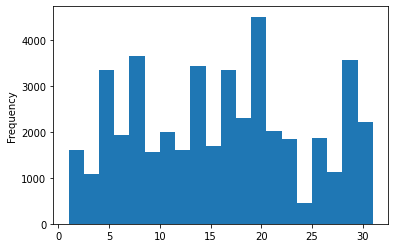

Column name: duration
Unique values: 1573


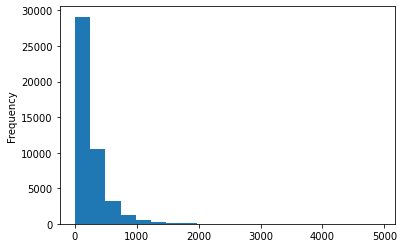

Column name: campaign
Unique values: 48


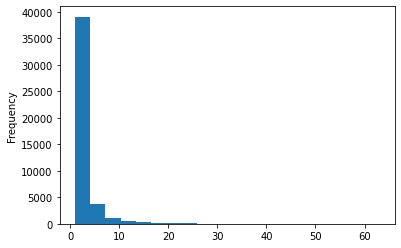

Column name: pdays
Unique values: 559


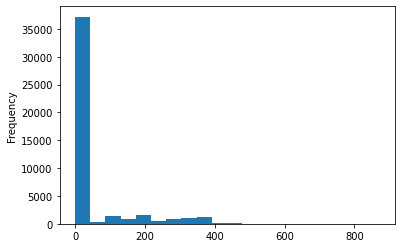

Column name: previous
Unique values: 41


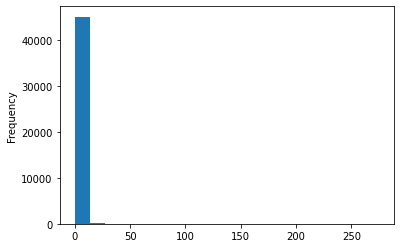

Column name: y
Unique values: 2


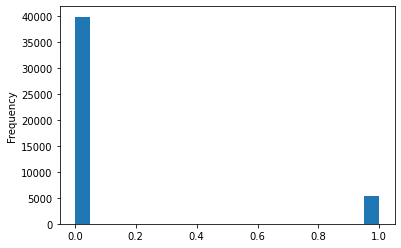

In [20]:
### Numeric columns

for column in numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values: {len(dataset[column].unique())}')
  dataset[column].plot.hist(bins=20)
  plt.show()

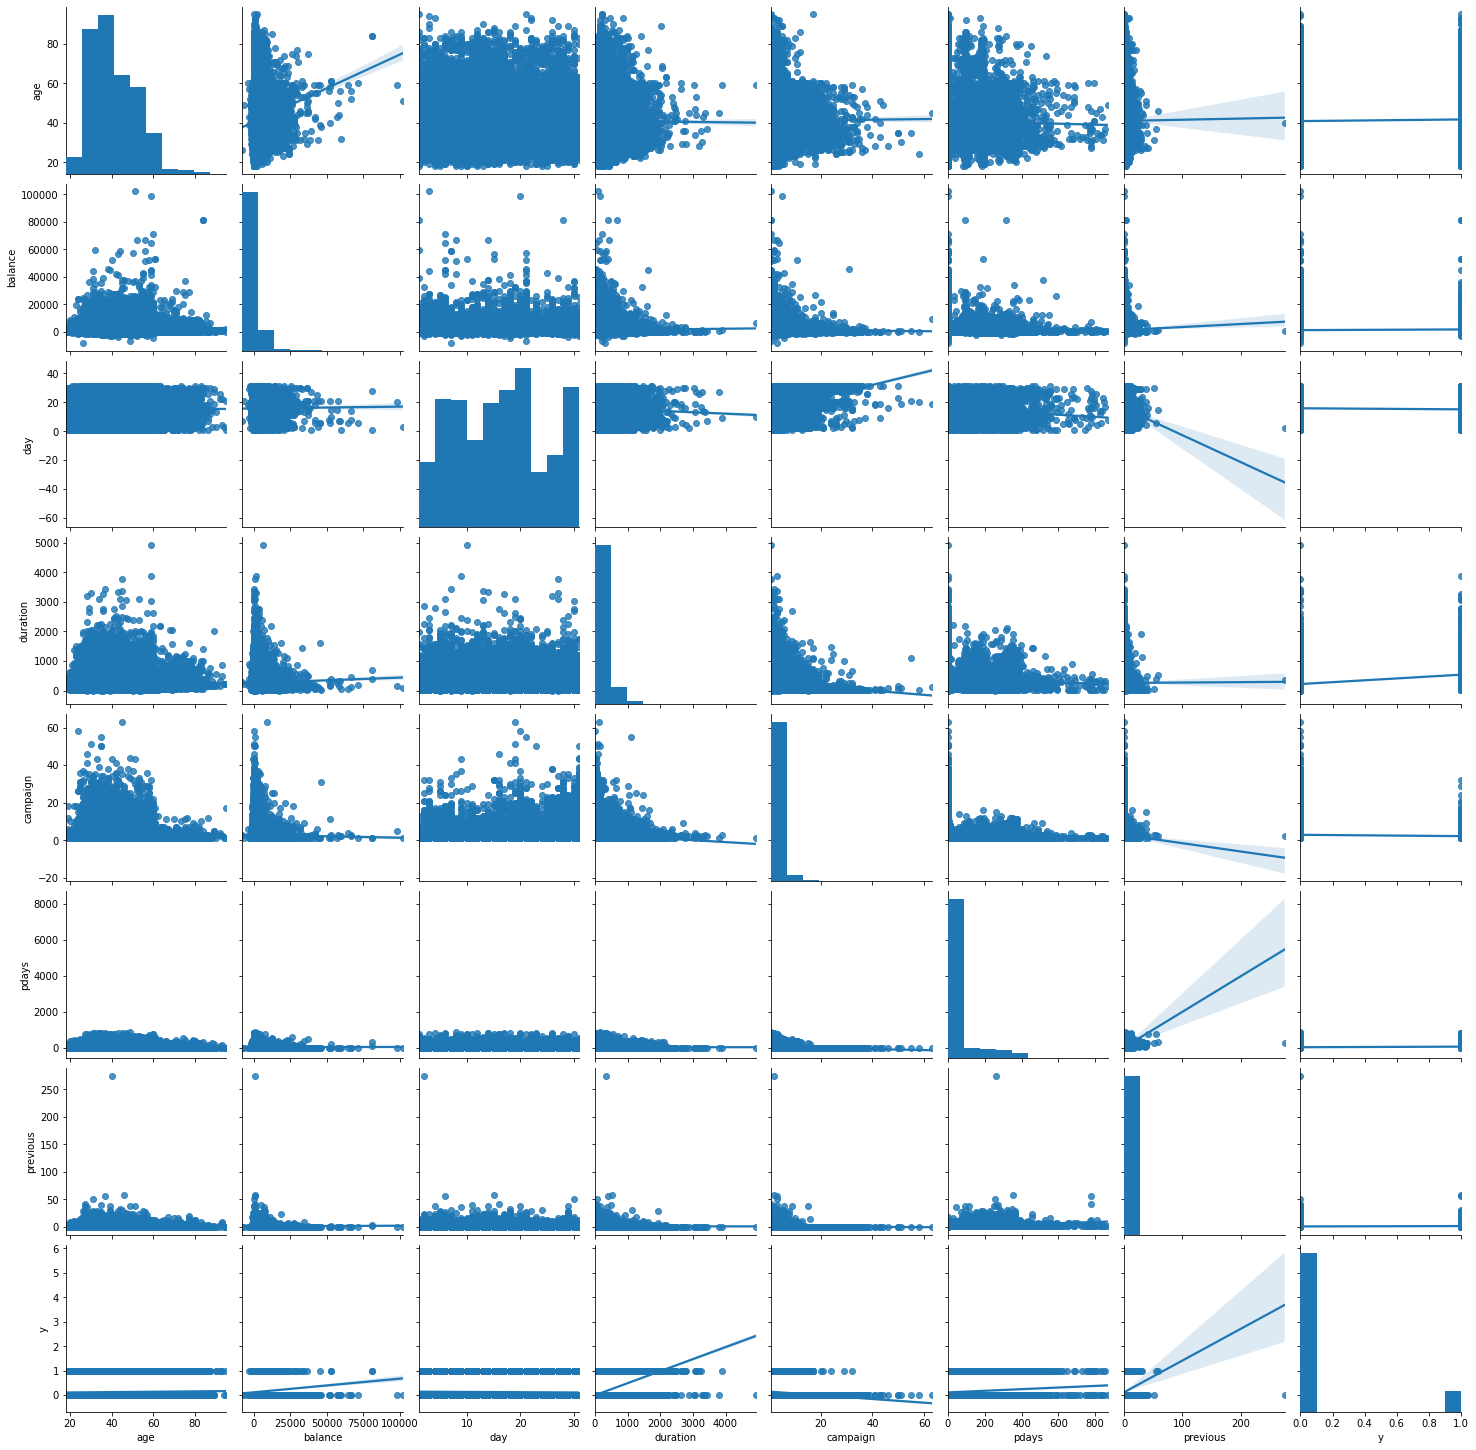

In [21]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Column name: job
Unique values:12


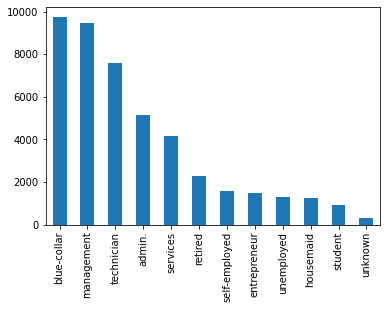

Column name: marital
Unique values:3


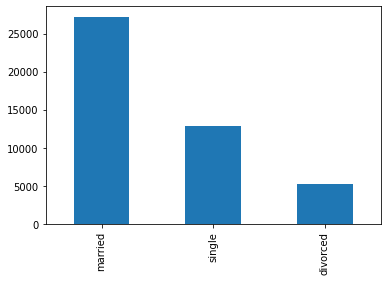

Column name: education
Unique values:4


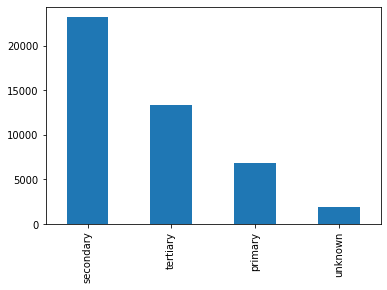

Column name: default
Unique values:2


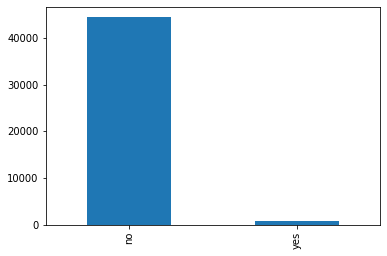

Column name: housing
Unique values:2


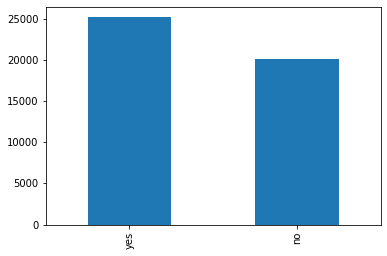

Column name: loan
Unique values:2


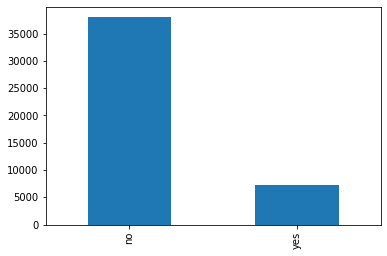

Column name: contact
Unique values:3


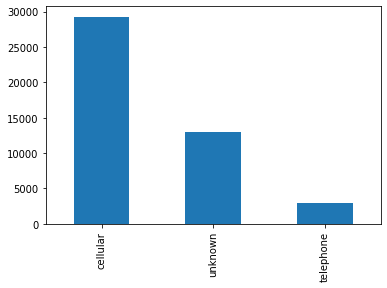

Column name: month
Unique values:12


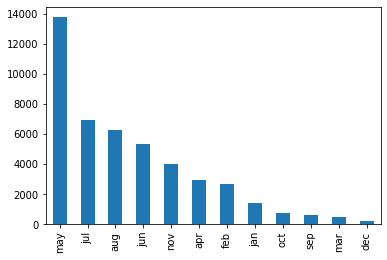

Column name: poutcome
Unique values:4


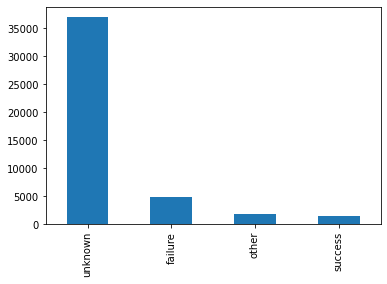

In [22]:
### Categorical columns

for column in non_numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values:{len(dataset[column].unique())}')
  dataset[column].value_counts().plot.bar()
  plt.show()

In [23]:
dataset[dataset['duration']!=0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


### Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding
* columns that should be removed: pdays, previous, duration, day, month

### Data Preperation

In [65]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [68]:
for column in non_numeric_columns:
  print(dataset[column].value_counts())
  print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

#### Converting categorical attributes into numbers

In [69]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [72]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [73]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [74]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

#### Drop not used columns

In [82]:
dataset.drop(['day','pdays','previous','poutcome'],axis=1,inplace=True)

In [83]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,may,198,1,0


In [87]:
dataset = pd.get_dummies(data=dataset,prefix_sep='_',drop_first=True)

In [89]:
dataset.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

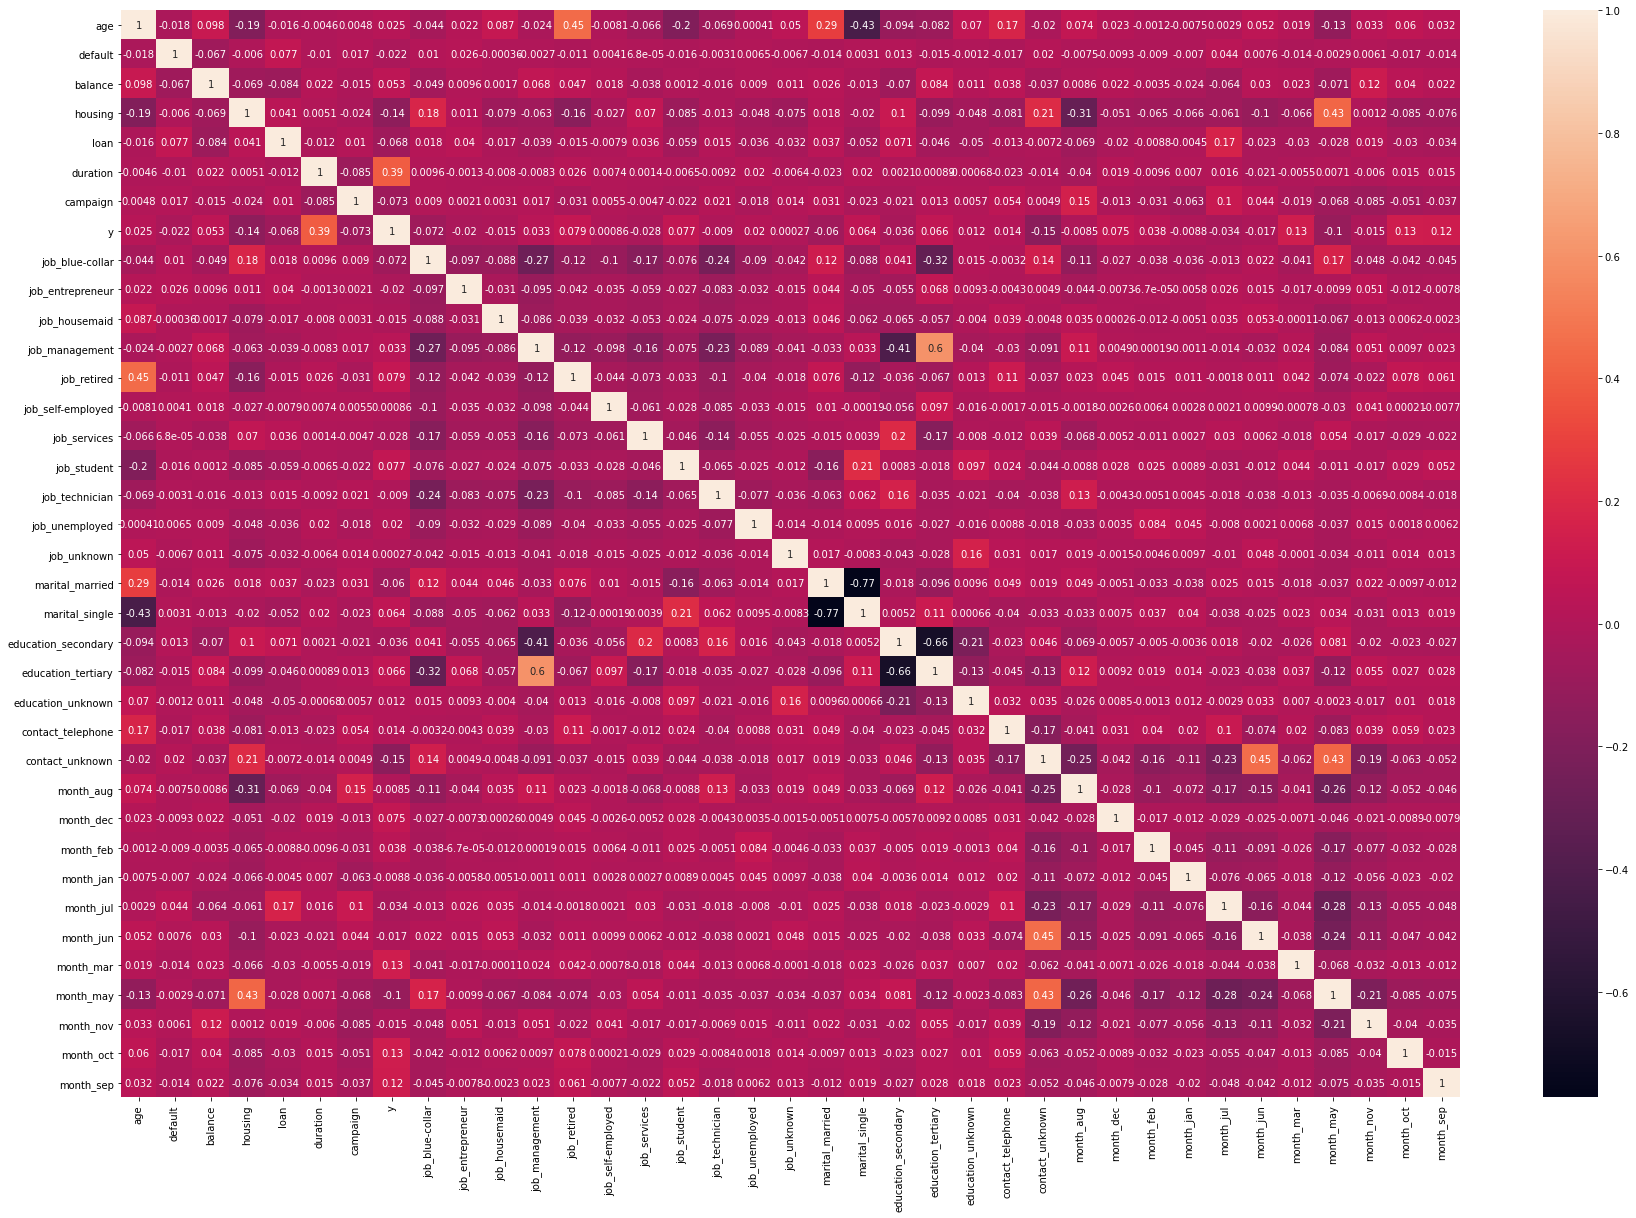

In [95]:
corr = dataset.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=corr,annot=True)

In [98]:
corr['y'].sort_values(ascending=False)

y                      1.000000
duration               0.394521
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
month_jul             -0.034382
education_secondary   -0.036388
marital_married       -0.060260
loan    

### Modeling

In [24]:
X = dataset[['age','balance']]
y= dataset['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=16)

In [25]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
X.shape,y.shape

((45211, 2), (45211,))

In [27]:
accuracy_score(y_test,model.predict(X_test))

0.8786493659687408

In [28]:
model.predict_proba(X_test)

array([[0.89045659, 0.10954341],
       [0.87680919, 0.12319081],
       [0.89216018, 0.10783982],
       ...,
       [0.87975062, 0.12024938],
       [0.89457862, 0.10542138],
       [0.89404161, 0.10595839]])

In [29]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.5282106953204124